In [17]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [3]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Visualization of Popularity Distribution

Text(0.5, 1.0, 'Popularity Distribution')

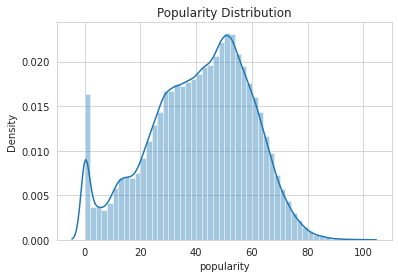

In [6]:
sns.distplot(data['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Time')

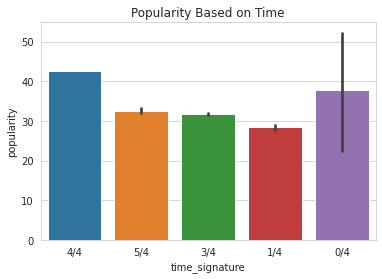

In [7]:
sns.barplot(x = 'time_signature', y = 'popularity', data = data)
plt.title('Popularity Based on Time')

Popularity based on mode

Text(0.5, 1.0, 'Popularity Based on Mode')

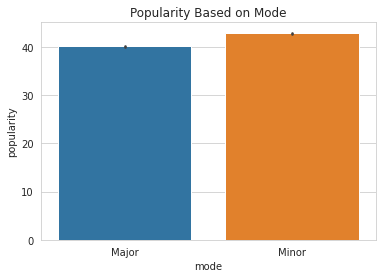

In [8]:
sns.barplot(x = 'mode', y = 'popularity', data = data)
plt.title('Popularity Based on Mode')

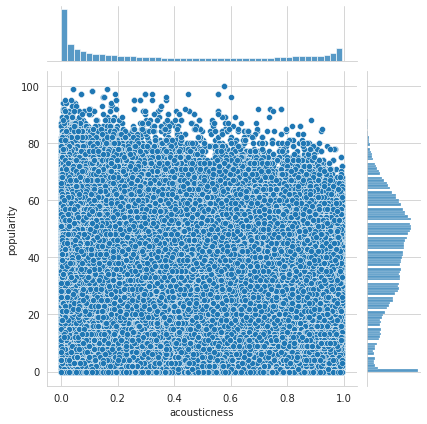

In [9]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = data)


Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

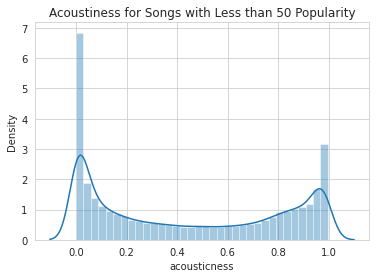

In [10]:
popular_below_50 = data[data.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

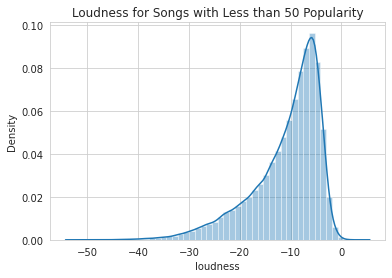

In [11]:
popular_below_50 = data[data.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.

Key: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.

In [12]:
list_of_keys = data['key'].unique()
for i in range(len(list_of_keys)):
    data.loc[data['key'] == list_of_keys[i], 'key'] = i
data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232114,Soul,The Delfonics,Stop and Look (And You Have Found Love),3rku9V5AEQU1anXvfyUTmD,36,0.7790,0.687,166693,0.4550,0.050100,9,0.0833,-6.963,Minor,0.0298,93.206,4/4,0.370
12292,Alternative,Brandon Heath,Jesus In Disguise,6gAifEnsklSTHLp8XbiuCK,41,0.1830,0.514,218627,0.6970,0.000044,7,0.3580,-6.439,Minor,0.0260,83.962,4/4,0.503
179875,Jazz,Chris Standring,Soul Express,6j9WWYS5j00w1MltPhTlH3,31,0.8640,0.696,278667,0.4000,0.817000,2,0.1030,-9.791,Major,0.0581,98.000,4/4,0.632
146773,Jazz,Mujo,Christmas Chill,5DPOA0BfvqhGuiuosDgzMN,49,0.3180,0.638,125067,0.0703,0.937000,2,0.1070,-12.257,Major,0.1650,77.366,4/4,0.648
38623,Electronic,Hot Chip,Colours,3VoR1vvkJqskGQ6RFMSPVN,39,0.0983,0.746,328947,0.5810,0.001090,2,0.0807,-7.247,Major,0.0575,154.017,4/4,0.424


Mode: We will assign major = 1 and minor = 0.



In [13]:
data.loc[data["mode"] == 'Major', "mode"] = 1
data.loc[data["mode"] == 'Minor', "mode"] = 0
data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
158868,Reggaeton,Don Omar,Ella Ella,7AObnx2EzL6FeYjmdjPCoA,48,0.1880,0.821,202600,0.667,0.000,2,0.0647,-5.845,0,0.1240,96.415,4/4,0.688
95646,Indie,Xuitcasecity,Waiting For,3hVATUDG5MiMJbakl6YBlB,55,0.5220,0.728,161649,0.715,0.000,5,0.0886,-5.610,0,0.1210,125.115,4/4,0.366
20709,Dance,Akon,Cashin Out,3mrvebxoRoQmQz7XOYS2Yl,49,0.1720,0.791,255021,0.697,0.000,0,0.2270,-3.469,0,0.0997,130.030,4/4,0.659
167101,Classical,Wolfgang Amadeus Mozart,"Sonata for Piano and Violin in C, K.296: 3. Ro...",5KF8le3desnkYKVxfw2ugL,22,0.9900,0.450,295000,0.130,0.527,2,0.0772,-20.672,1,0.0607,168.593,4/4,0.850
77708,Children’s Music,YUNGBLUD,Loner,5QMmZqzh93EY6gJG4PmzHA,68,0.0285,0.270,215185,0.948,0.000,0,0.1520,-2.979,1,0.1360,98.765,4/4,0.475


In [14]:
list_of_time_signatures = data['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    data.loc[data['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
52641,Blues,Phish,Birds Of A Feather,0xCUU7DSGDTVOjiZEyy0md,25,0.231000,0.561,254867,0.8670,0.007620,4,0.1380,-5.334,0,0.1270,171.192,0,0.871
128256,Classical,Wolfgang Amadeus Mozart,"Piano Concerto No.20 in D minor, K.466: 1. All...",26Sy5Q3KlhTap2zVcAAVFc,31,0.981000,0.327,918413,0.0775,0.801000,8,0.0786,-24.232,0,0.0401,128.069,0,0.149
219586,World,Vieux Farka Touré,All the Same,0ZEzJcDzp185JquZQNZf8V,30,0.705000,0.452,269693,0.6990,0.000002,11,0.1560,-6.800,1,0.0358,149.975,0,0.426
38592,Electronic,Destructo,Catching Plays (feat. Pusha T & Starrah) - Cos...,5jIDADV9AVzPBeMJqMhvHg,28,0.004910,0.836,283841,0.7300,0.002340,11,0.2350,-6.753,1,0.1720,123.988,0,0.425
34127,Anime,Last Note.,Akatsuki Arrival,6n5ruNvjNSEll7gE1vkRxs,16,0.000793,0.496,280000,0.9680,0.000003,7,0.0860,-2.751,1,0.0848,125.021,0,0.559


In [15]:
data['key']=data['key'].astype(str).astype(int)
data['mode']=data['mode'].astype(str).astype(int)
data['time_signature']=data['time_signature'].astype(str).astype(int)

print(data.dtypes)

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object


Popularity

In [16]:
data.loc[data['popularity'] < 57, 'popularity'] = 0 
data.loc[data['popularity'] >= 57, 'popularity'] = 1
data.loc[data['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.689,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.610,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.520,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.366,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.621,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,1,0.27300,0.833,318800,0.661,0.000149,9,0.2940,-7.595,0,0.1010,108.314,0,0.8580
230782,Soul,Alex Hepburn,If You Stay,4sJoIeb8zWYCLHSLM0az3b,1,0.04530,0.719,194554,0.702,0.000013,11,0.0662,-4.577,1,0.0357,116.938,0,0.6130
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,1,0.00862,0.567,163840,0.753,0.001830,5,0.1270,-4.823,1,0.0406,120.098,0,0.5660
230946,Soul,James Brown,Papa's Got A Brand New Bag - Pt. 1,5aZzmPUv5a2nna9sxBrmpL,1,0.51900,0.775,128973,0.725,0.054100,5,0.0944,-8.369,1,0.0944,129.681,0,0.9140


Model Fitting and Predicting

In [18]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [20]:
#train and test split of data
training = data.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = data.drop(training.index)[features]

In [21]:
#We add a validation dataset using train_test_split.

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

Random Forest

In [22]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9208561607046943
AUC: 0.8324767591217018


KNN model

In [23]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7735524760983994
AUC: 0.6154249990048827


XG Boost

In [24]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_valid)
  
XGB_Accuracy = accuracy_score(y_valid, xgb_yhat)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_valid, xgb_yhat) 
print("AUC: " + str(XGB_AUC))

Accuracy: 0.7919486518423031
AUC: 0.5172997510420607


MLP Classifier

In [25]:
mlp=MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)
mlp_pred=mlp.predict(X_valid)

mlp_accuracy=accuracy_score(y_valid,mlp_pred)
print("Accuracy: "+ str(mlp_accuracy))

mlp_AUC = roc_auc_score(y_valid, mlp_pred) 
print("AUC: " + str(mlp_AUC))

Accuracy: 0.7891288000859383
AUC: 0.4997448892819484


Linear Regression

In [26]:
lp = LinearRegression(fit_intercept=True)
lp.fit(X_train, y_train)
lp_pred=lp.predict(X_valid)

lp_accuracy=accuracy_score(y_valid,lp_pred.round(), normalize=False)
#accuracy_score(y_true, y_pred, normalize=False)
print("Accuracy: "+ str(lp_accuracy))

lp_AUC = roc_auc_score(y_valid, lp_pred) 
print("AUC: " + str(lp_AUC))

Accuracy: 29401
AUC: 0.7115378443007823


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [36]:
train_rmse = mean_squared_error(lr_pred, y_train, squared=False)


In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_train)

In [38]:
print('The RMSE loss for training set is ', train_rmse)


The RMSE loss for training set is  0.39008171448531126


Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
random_forest_model = RandomForestRegressor(n_jobs=-1, 
                                            random_state=42, 
                                            max_depth=15, 
                                            n_estimators=100, 
                                            max_features=10)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=10, n_jobs=-1, random_state=42)

In [41]:
train_acc = random_forest_model.score(X_train, y_train)
train_rmse = mean_squared_error(random_forest_model.predict(X_train), y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse, ' and accuracy is ', train_acc*100, '%')

The RMSE loss for training set is  0.31439486903435065  and accuracy is  40.62225826681677 %


In [42]:
val_acc = random_forest_model.score(X_valid, y_valid)
val_rmse = mean_squared_error(random_forest_model.predict(X_valid), y_valid, squared=False)
print('The RMSE loss for validation set is ', val_rmse, ' and accuracy is ', val_acc*100, '%')

The RMSE loss for validation set is  0.34885072261800415  and accuracy is  26.764290704255277 %


XG Boosting Regression

In [43]:
from xgboost import XGBRegressor

In [44]:
gbm_model = XGBRegressor(random_state=42, 
                         n_jobs=-1, 
                         n_estimators=200, 
                         max_depth=8, 
                         learning_rate=0.2)
gbm_model.fit(X_train, y_train)

[06:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=-1,
             random_state=42)

In [45]:
train_acc = gbm_model.score(X_train, y_train)
train_rmse = mean_squared_error(gbm_model.predict(X_train), y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse, ' and accuracy is ', train_acc*100, '%')

The RMSE loss for training set is  0.2827907444466701  and accuracy is  51.95998222681166 %


In [46]:
val_acc = gbm_model.score(X_valid, y_valid)
val_rmse = mean_squared_error(gbm_model.predict(X_valid), y_valid, squared=False)
print('The RMSE loss for validation set is ', val_rmse, ' and accuracy is ', val_acc*100, '%')

The RMSE loss for validation set is  0.3394067796850503  and accuracy is  30.67583224146877 %


KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor


In [48]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [49]:
train_acc = knn_model.score(X_train, y_train)
train_rmse = mean_squared_error(knn_model.predict(X_train), y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse, ' and accuracy is ', train_acc*100, '%')

The RMSE loss for training set is  0.31713601144981696  and accuracy is  39.582340571401645 %


Model Performance Summary

In [50]:
model_performance_accuracy = pd.DataFrame({'Model': ['LinearRegression', 
                                                     'MLPClassifier', 
                                                     'KNeighborsClassifier',
                                                      'Random Forest',
                                                      'XGBClassifier'],
                                            'Accuracy': [lp_accuracy,
                                                         mlp_accuracy,
                                                         KNN_Accuracy,
                                                         RFC_Accuracy,
                                                          XGB_Accuracy]})
                                                         
                                                         


model_performance_AUC = pd.DataFrame({'Model': ['LinearRegression', 
                                                     'MLPClassifier', 
                                                     'KNeighborsClassifier',
                                                      'Random Forest',
                                                      'XGBClassifier'],
                                            'AUC': [lp_AUC,
                                                     mlp_AUC,
                                                     KNN_AUC,
                                                     RFC_AUC,
                                                    XGB_AUC]})

In [51]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
0,LinearRegression,29401.000000
3,Random Forest,0.920856
4,XGBClassifier,0.791949
1,MLPClassifier,0.789129
2,KNeighborsClassifier,0.773552


In [52]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
3,Random Forest,0.832477
0,LinearRegression,0.711538
2,KNeighborsClassifier,0.615425
4,XGBClassifier,0.517300
1,MLPClassifier,0.499745


Conclusion

Using a dataset of 228,000 Spotify Tracks, we were able to predict popularity (greater than 57 popularity) using audio-based metrics such as key, mode etc.,without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 83.2% AUC. The XG Boost Classifier was the second best performing algorithm with 79% accuracy and 51% AUC.